# Do you know your stroke risk?

Source of the data: https://www.sciencedirect.com/science/article/pii/S0933365719302295?via%3Dihub
Liu, Tianyu; Fan, Wenhui; Wu, Cheng (2019), “Data for: A hybrid machine learning approach to cerebral stroke prediction based on imbalanced medical-datasets”, Mendeley Data, V1, doi: 10.17632/x8ygrw87jw.1

The medical dataset contains 43,400 records of potential patients which includes 783 occurrences of stroke. 

Cerebral stroke has become a significant global public health issue. The ideal solution to this concern is to prevent in advance by controlling related metabolic factors. However, it is difficult for medical staff to decide whether special precautions are needed for a potential patient only based on the monitoring of physiological indicators unless they are obviously abnormal. This project builds a machine learning model to predict whether someone is at risk of having a stroke.

The data in each row includes numerical factors, such as age and average glucose levels, and categorical factors, such as "has heart disease" (yes or no), work type, and smoking status. This is not an exhaustive list. We use this data to determine which factors contribute to having a stroke, and among those which hold the most weight.

### Data Dictionary
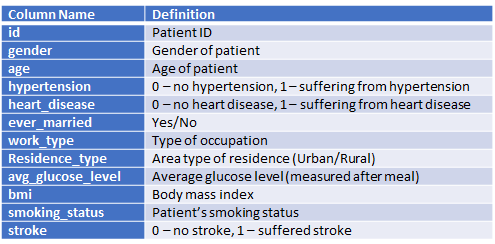

# Step 1: Clean the data and pre-process

## Basic analysis of the input dataset

In [1]:
# Dependencies and Setup

import pandas as pd

%matplotlib inline
from matplotlib import style
# style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import scipy.stats as sts
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

# Read the stroke dataset
input_csv = pd.read_csv("data/stroke_dataset.csv", delimiter=',', skipinitialspace=True)
input_csv.shape

(43400, 12)

In [2]:
# Display the input data for preview
input_csv

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [3]:
# Check the number of unique records using groupby
csv_group = input_csv.groupby("id")
len(csv_group)

43400

## Identify missing values in machine learning dataset

In [4]:
# Count missing values for each column of the input dataset

input_csv.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

### Options for dealing with missing data:

1. Deleting Rows
1. Replacing With Mean/Median/Mode
1. Assigning An Unique Category
1. Predicting The Missing Values
1. Using Algorithms Which Support Missing Values

In [5]:
# Count values for each column of the input dataset

input_csv.notnull().sum()

id                   43400
gender               43400
age                  43400
hypertension         43400
heart_disease        43400
ever_married         43400
work_type            43400
Residence_type       43400
avg_glucose_level    43400
bmi                  41938
smoking_status       30108
stroke               43400
dtype: int64

In [6]:
# List the categorical columns present in the dataset
input_csv.select_dtypes(exclude=np.number).columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [7]:
# List the numerical columns present in the dataset
input_csv.select_dtypes(include=np.number).columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

In [8]:
# How many people had a stroke.
how_many_people_had_a_stroke = len(input_csv[input_csv["stroke"] == 1])
how_many_people_had_a_stroke

783

In [9]:
# Percentage of people who had a stroke
percentage_of_people_who_had_a_stroke = (how_many_people_had_a_stroke / len(input_csv) ) * 100
percentage_of_people_who_had_a_stroke

1.804147465437788

In [10]:
# Youngest, oldest, and average age of people who had a stroke
youngest_stroke = input_csv.loc[input_csv.stroke==1, "age"].min()
oldest_stroke = input_csv.loc[input_csv.stroke==1, "age"].max()
avg_age_stroke = input_csv.loc[input_csv.stroke==1, "age"].mean()
print(f"Youngest person who had a stroke: {youngest_stroke}")
print(f"Oldest person who had a stroke: {oldest_stroke}")
print(f"Average age of people who had a stroke: {avg_age_stroke}")

Youngest person who had a stroke: 1.32
Oldest person who had a stroke: 82.0
Average age of people who had a stroke: 68.14344827586207


In [11]:
yougest_df = pd.DataFrame(input_csv[(input_csv["stroke"] == 1) & (input_csv["age"] == youngest_stroke)])
yougest_df.shape

(1, 12)

In [12]:
yougest_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9961,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,NaN,1


In [13]:
oldest_df = pd.DataFrame(input_csv[(input_csv["stroke"] == 1) & (input_csv["age"] == oldest_stroke)])
oldest_df.shape

(36, 12)

In [14]:
oldest_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1315,64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,NaN,1
1874,39373,Female,82.0,1,0,Yes,Self-employed,Urban,196.92,22.2,never smoked,1
2034,712,Female,82.0,1,1,No,Private,Rural,84.03,26.5,formerly smoked,1
2736,61960,Male,82.0,0,1,Yes,Private,Urban,144.90,26.4,smokes,1
3292,38829,Female,82.0,0,0,Yes,Private,Rural,59.32,33.2,never smoked,1
7590,37132,Male,82.0,0,0,Yes,Govt_job,Urban,200.59,29.0,formerly smoked,1
8422,20439,Male,82.0,0,1,Yes,Govt_job,Rural,103.68,25.0,never smoked,1
11475,67895,Female,82.0,1,1,Yes,Govt_job,Urban,215.94,27.9,formerly smoked,1
11504,30184,Male,82.0,0,0,Yes,Private,Rural,86.62,29.5,formerly smoked,1
15329,24293,Female,82.0,0,1,No,Private,Urban,111.30,22.3,never smoked,1


## Numerical and Categorical Analysis

In [15]:
# Create list of possible categorical features
possible_categorical_features = ["gender",
                                 "hypertension",
                                 "heart_disease",
                                 "ever_married",
                                 "work_type",
                                 "Residence_type",
                                 "smoking_status"]

# Create list of possible numerical features
possible_numerical_features = ["age",
                               "avg_glucose_level",
                               "bmi"]

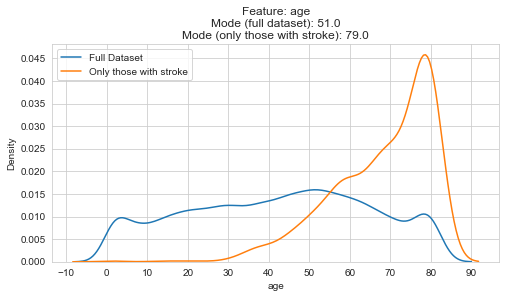

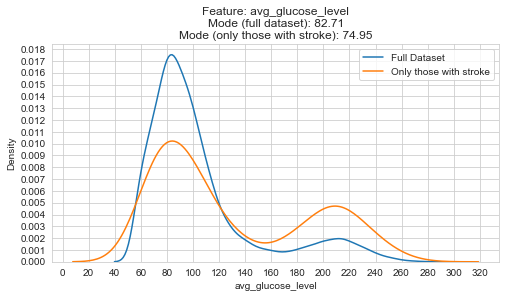

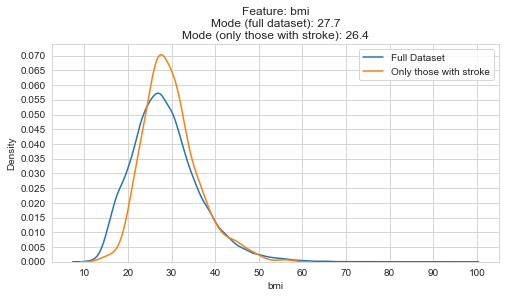

In [16]:
# Make kdeplot for each possible numerical feature
for possible_feature in possible_numerical_features:
    
    plt.figure(figsize=(8,4))
    # Make two kdeplots,
    # one for the complete dataset,
    # and one for only those who had a stroke
    sns.kdeplot(input_csv[possible_feature])
    sns.kdeplot(input_csv[input_csv["stroke"] == 1][possible_feature])

    # Calculate the mode of the current feature,
    # (for both the complete dataset and the only-stroke-true subset)
    # To include in the plot title
    full_dataset_mode = round(input_csv.mode()[possible_feature][0], 2)
    stroke_true_mode = round(input_csv[input_csv["stroke"] == 1].mode()[possible_feature][0], 2)
    plt.title(f"Feature: {possible_feature}\nMode (full dataset): {full_dataset_mode}\nMode (only those with stroke): {stroke_true_mode}")
    
    # Find the minimum and maximum values from the current column
    # in order to calculate the range
    # Divide this range by a small number to set a new step-size for the x-axis
    column_max = input_csv[possible_feature].max()
    column_min = input_csv[possible_feature].min()
    column_range = column_max - column_min
    
    # Divide the column range by 10 for the plot showing avg_glucose_level,
    # otherwise the step-size would be too low and the x-axis would be unreadable.
    # We still want to divide the range by 5 to find the step-size for the other graphs,
    # as more x-ticks help us to more clearly see where the data lies.
    if possible_feature == "avg_glucose_level":
        plt.locator_params(nbins=column_range/10)
    else: 
        plt.locator_params(nbins=column_range/5)
        
    plt.legend(labels=["Full Dataset", "Only those with stroke"])
    plt.savefig("static/images/Density Chart - "+possible_feature+".png",bbox_inches='tight')
    
    plt.show()

#### Observations:

1. In the full dataset, most people appear to have an age close to 51. For those who had a stroke, most people have an age close to 79.
2. In the the full dataset, most people appear to have an average glucose level (AGL) close to 82.71. For those who had a stroke, most people have an AGL close to 74.95. In both cases, the frequency of AGLs drop sharply after this value, though there is a slight spike in frequency for individuals with an average glucose level just over 160. 
3. In the full dataset, most people appear to have a BMI close to 27.7. For those who had a stroke, most people have a BMI close to 26.4.

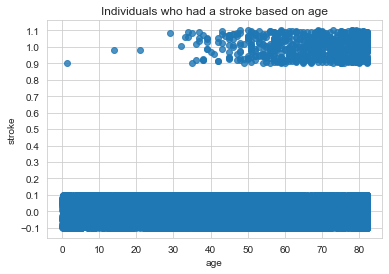

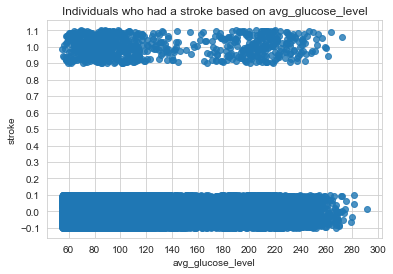

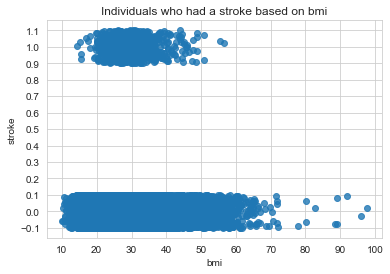

In [17]:
# Make a regplot for each potential numerical feature
for possible_feature in possible_numerical_features:
    sns.regplot(x=possible_feature, y="stroke", data=input_csv, fit_reg=False, y_jitter=0.1)
    plt.title(f"Individuals who had a stroke based on {possible_feature}")
    
    # Find the minimum and maximum values from the current column
    # in order to calculate the range
    # Divide this range by a small number to set a new step-size for the x-axis
    column_max = input_csv[possible_feature].max()
    column_min = input_csv[possible_feature].min()
    column_range = column_max - column_min
    
    # Divide the column range by 10 for the plot showing avg_glucose_level,
    # otherwise the step-size would be too low and the x-axis would be unreadable.
    # We still want to divide the range by 5 to find the step-size for the other graphs,
    # as more x-ticks help us to more clearly see where the data lies.
    if possible_feature == "avg_glucose_level":
        plt.locator_params(nbins=column_range/10)
    else: 
        plt.locator_params(nbins=column_range/5)
    
    plt.show()

#### Observations:

1. Those who did not have a stroke could be any age, while those who did have a stroke are most heavily concentrated in the 50+ years age group. There is a smaller but still sizable number of people in the range of 40-50 years old, and an even smaller but still sizable number of people in the range of 30-40 years old. Very few people below the age of 30 had a stroke.
2. Those who did not have a stroke could have any average glucose level (AGL) in the approximate range of 60 to 270. A smaller but still sizable number of people exceed an AGL of 270. Those who did have a stroke are concentrated in two separate ranges. The first range is from approximately 60 to approximately 120; the second range is from approximately 180 to approximately 240.  There is a noticeable gap between an AGL of about 120 to 180, where there are fewer data points.
3. Those who did not have a stroke could have any BMI in the approximate range of 10 to 60. A smaller but still sizable number of people have a BMI exceeding 60 also did not have a strok. Very few people have a BMI exceeding 72. Those who did have a stroke are concentrated in the approximate BMI range of 20 to 40. Very few people have a BMI of less than 20. A smaller but still sizeable number of people exceed a BMI of 40, and no one has a BMI over 60.

## gender

In [18]:
# Overview of gender
# Get the exact number and percentage of people in each gender group in the full dataset
s3 = input_csv.groupby("gender").stroke.count()
s2 = input_csv["stroke"].count()
s4 = s3/s2*100

print(f"Total in full dataset: {s2}")
print(s3)
print()
print(f"Percentage in full dataset")
print(s4)

Total in full dataset: 43400
gender
Female    25665
Male      17724
Other        11
Name: stroke, dtype: int64

Percentage in full dataset
gender
Female    59.135945
Male      40.838710
Other      0.025346
Name: stroke, dtype: float64


In [19]:
# Get the exact number and percentage of people in each gender group that had a stroke
s3 = input_csv.groupby("gender").stroke.sum()
s2 = input_csv["stroke"].sum()
s4 = s3/s2*100

print(f"Total number of people with a stroke: {s2}")
print(s3)
print()
print(f"Percentage of people who had a stroke")
print(s4)

Total number of people with a stroke: 783
gender
Female    431
Male      352
Other       0
Name: stroke, dtype: int64

Percentage of people who had a stroke
gender
Female    55.0447
Male      44.9553
Other      0.0000
Name: stroke, dtype: float64


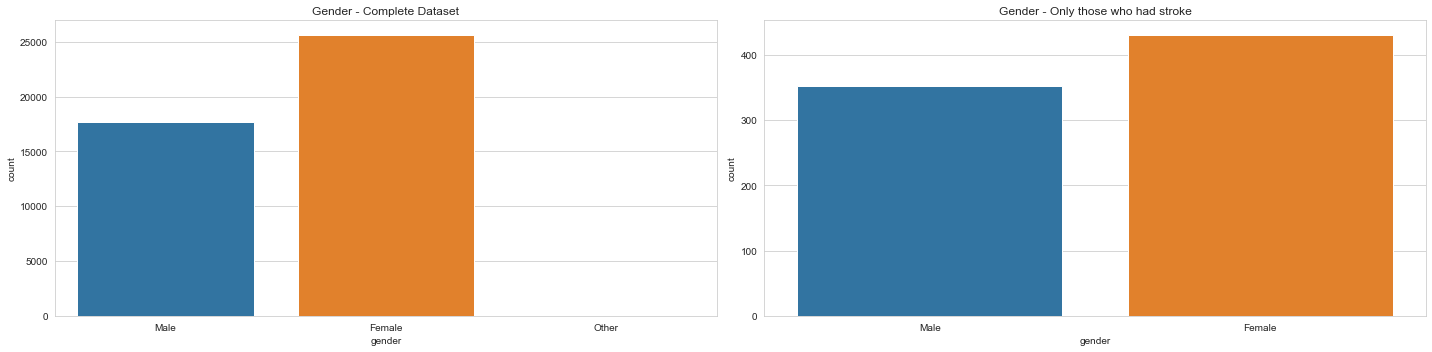

In [20]:
# Define a figure so that we can make two subplots, one for the complete dataset,
# and one for filtering the data to just those who had a stroke
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

sns.countplot(input_csv["gender"], ax=ax[0])
ax[0].set_title("Gender - Complete Dataset")

sns.countplot(input_csv[input_csv["stroke"] == 1]["gender"], ax=ax[1])
ax[1].set_title("Gender - Only those who had stroke")
plt.tight_layout()

plt.savefig("static/images/Gender Analysis.png",bbox_inches='tight')

## age

In [21]:
# Overview of age
input_csv["age"].value_counts()

51.00    738
52.00    721
53.00    701
78.00    698
50.00    694
        ... 
0.48      37
0.40      35
1.00      34
0.16      26
0.08      17
Name: age, Length: 104, dtype: int64

In [22]:
input_csv["age"].min()

0.08

In [23]:
input_csv["age"].max()

82.0

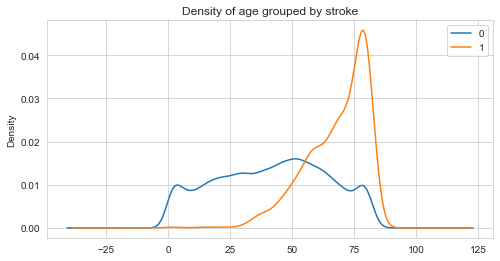

In [24]:
# Density of age grouped by stroke
plt.figure(figsize=(8,4))
input_csv.groupby("stroke").age.plot(kind='kde')
plt.title("Density of age grouped by stroke")

plt.legend()
plt.show()

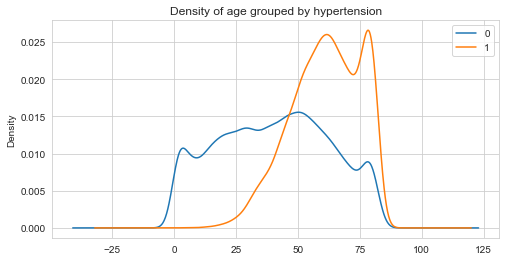

In [25]:
# Density of age grouped by hypertension
plt.figure(figsize=(8,4))
input_csv.groupby("hypertension").age.plot(kind='kde')
plt.title("Density of age grouped by hypertension")

plt.legend()
plt.show()

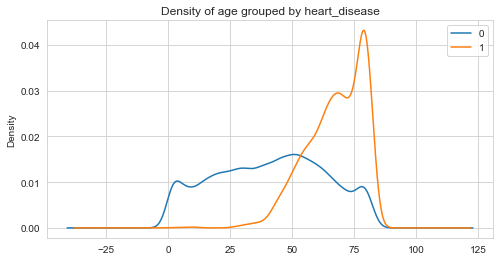

In [26]:
# Density of age grouped by heart_disease
plt.figure(figsize=(8,4))
input_csv.groupby("heart_disease").age.plot(kind='kde')
plt.title("Density of age grouped by heart_disease")

plt.legend()
plt.show()

## Categorize age

In [27]:
# Create the bins in which Data will be held
bins = [0, 19, 29, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 100]

# Create the names for the five bins
group_labels = ["<20", "20-29", "30-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84", ">84"]

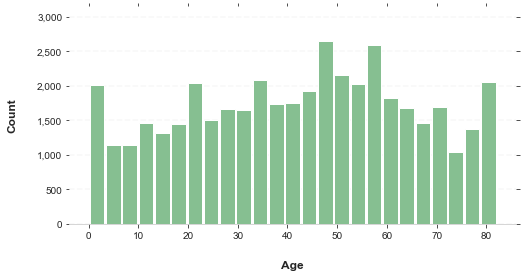

In [28]:
# Histogram of Age
from matplotlib.ticker import StrMethodFormatter

ax = input_csv.hist(column='age', bins=25, grid=False, figsize=(8,4), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Age", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [29]:
input_csv["age_group"] = pd.cut(input_csv["age"], bins, labels=group_labels)
input_csv

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0,<20
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,55-59
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0,<20
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,70-74
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,<20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,<20
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,55-59
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,80-84
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,40-44


In [30]:
# Creating a group based off of the bins
age_group = input_csv.groupby("age_group")
age_group[["stroke", "hypertension", "heart_disease"]].sum()

,stroke,hypertension,heart_disease
age_group,,,
<20,2,10,4
20-29,2,51,4
30-39,20,238,21
40-44,11,223,45
45-49,31,314,87
50-54,51,426,148
55-59,74,475,194
60-64,64,549,243
65-69,98,469,308


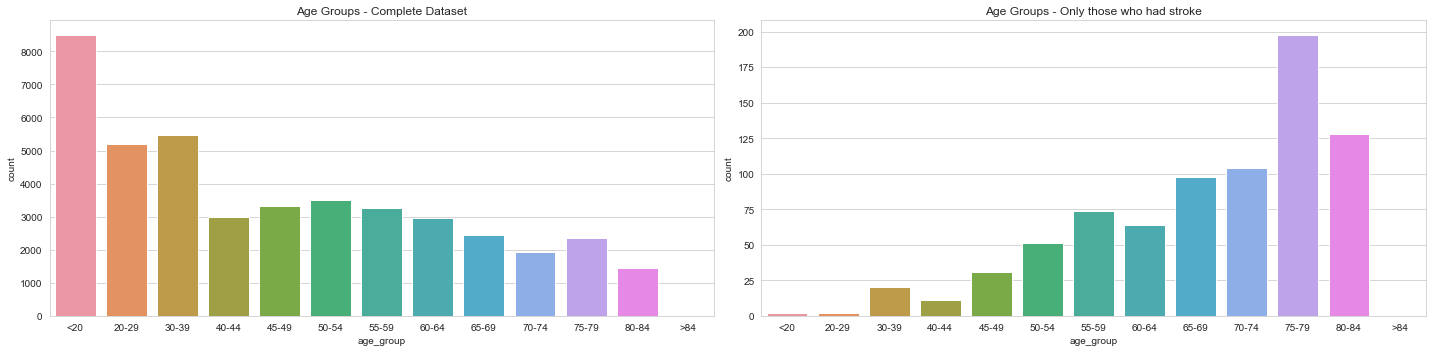

In [31]:
# Visualize how many people did and did not have a stroke
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

sns.countplot(input_csv["age_group"], ax=ax[0])
ax[0].set_title("Age Groups - Complete Dataset")

sns.countplot(input_csv[input_csv["stroke"] == 1]["age_group"], ax=ax[1])
ax[1].set_title("Age Groups - Only those who had stroke")
plt.tight_layout()

plt.savefig("static/images/Age Groups Analysis.png",bbox_inches='tight')

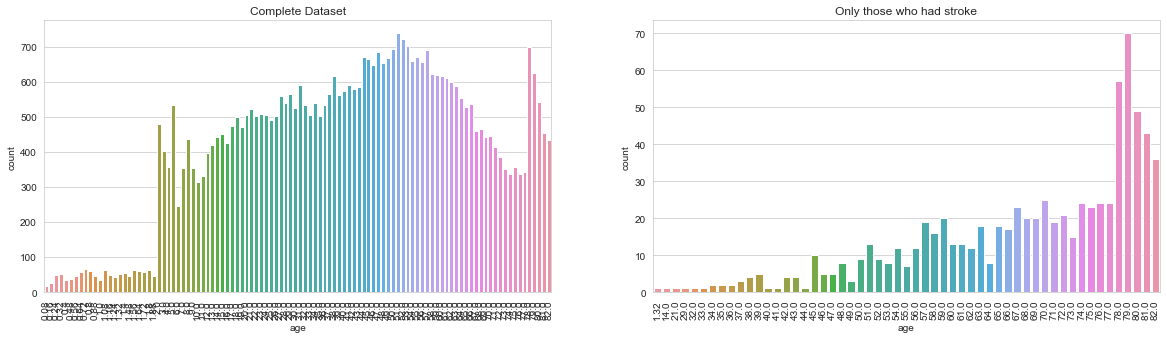

In [32]:
# Define a figure so that we can make two subplots, one for the complete dataset,
# and one for filtering the data to just those who had a stroke
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(input_csv["age"])
plt.title("Complete Dataset")

plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(input_csv[input_csv["stroke"] == 1]["age"])
plt.title("Only those who had stroke")

plt.xticks(rotation=90)

plt.show()

## hypertension

In [33]:
# Overview of hypertension
# Get the exact number and percentage of people in the full dataset
s3 = input_csv.groupby("hypertension").stroke.count()
s2 = input_csv["stroke"].count()
s4 = s3/s2*100

print(f"Total in full dataset: {s2}")
print(s3)
print()
print(f"Percentage in full dataset")
print(s4)

Total in full dataset: 43400
hypertension
0    39339
1     4061
Name: stroke, dtype: int64

Percentage in full dataset
hypertension
0    90.642857
1     9.357143
Name: stroke, dtype: float64


In [34]:
# Get the exact number and percentage of people that had a stroke
s3 = input_csv.groupby("hypertension").stroke.sum()
s2 = input_csv["stroke"].sum()
s4 = s3/s2*100

print(f"Total number of people with a stroke: {s2}")
print(s3)
print()
print(f"Percentage of people who had a stroke")
print(s4)

Total number of people with a stroke: 783
hypertension
0    583
1    200
Name: stroke, dtype: int64

Percentage of people who had a stroke
hypertension
0    74.457216
1    25.542784
Name: stroke, dtype: float64


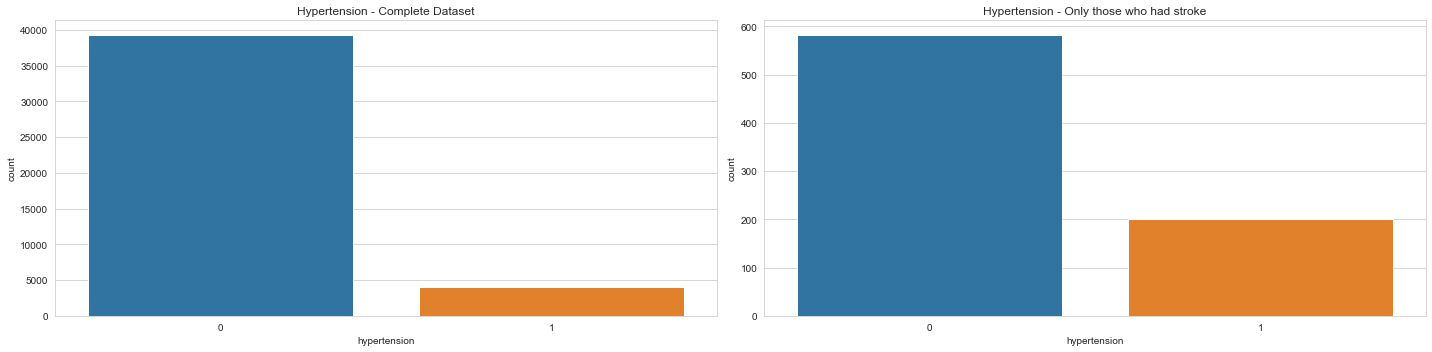

In [35]:
# Define a figure so that we can make two subplots, one for the complete dataset,
# and one for filtering the data to just those who had a stroke
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

sns.countplot(input_csv["hypertension"], ax=ax[0])
ax[0].set_title("Hypertension - Complete Dataset")

sns.countplot(input_csv[input_csv["stroke"] == 1]["hypertension"], ax=ax[1])
ax[1].set_title("Hypertension - Only those who had stroke")
plt.tight_layout()

plt.savefig("static/images/Hypertension Analysis.png",bbox_inches='tight')

## heart_disease

In [36]:
# Overview of heart_disease
# Get the exact number and percentage of people in the full dataset
s3 = input_csv.groupby("heart_disease").stroke.count()
s2 = input_csv["stroke"].count()
s4 = s3/s2*100

print(f"Total in full dataset: {s2}")
print(s3)
print()
print(f"Percentage in full dataset")
print(s4)

Total in full dataset: 43400
heart_disease
0    41338
1     2062
Name: stroke, dtype: int64

Percentage in full dataset
heart_disease
0    95.248848
1     4.751152
Name: stroke, dtype: float64


In [37]:
# Get the exact number and percentage of people that had a stroke
s3 = input_csv.groupby("heart_disease").stroke.sum()
s2 = input_csv["stroke"].sum()
s4 = s3/s2*100

print(f"Total number of people with a stroke: {s2}")
print(s3)
print()
print(f"Percentage of people who had a stroke")
print(s4)

Total number of people with a stroke: 783
heart_disease
0    606
1    177
Name: stroke, dtype: int64

Percentage of people who had a stroke
heart_disease
0    77.394636
1    22.605364
Name: stroke, dtype: float64


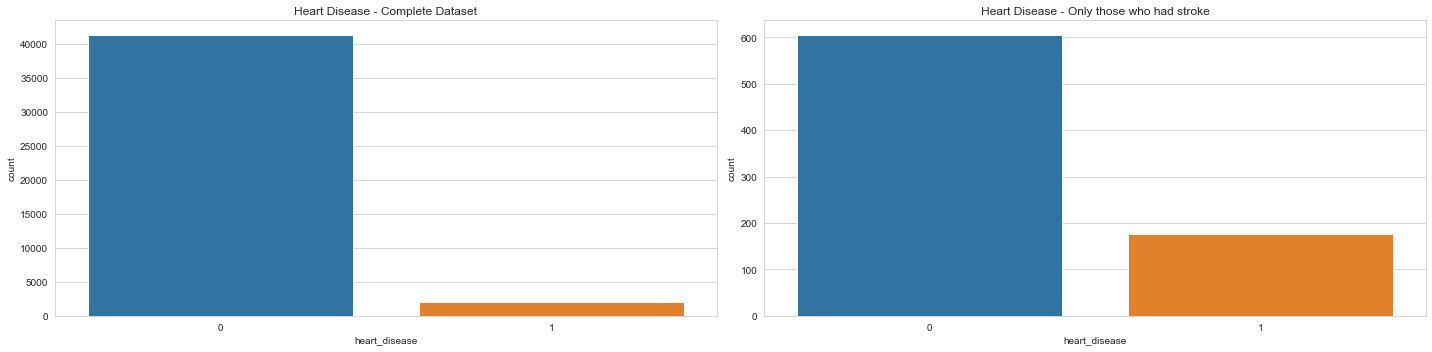

In [38]:
# Define a figure so that we can make two subplots, one for the complete dataset,
# and one for filtering the data to just those who had a stroke
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

sns.countplot(input_csv["heart_disease"], ax=ax[0])
ax[0].set_title("Heart Disease - Complete Dataset")

sns.countplot(input_csv[input_csv["stroke"] == 1]["heart_disease"], ax=ax[1])
ax[1].set_title("Heart Disease - Only those who had stroke")
plt.tight_layout()

plt.savefig("static/images/Heart Disease Analysis.png",bbox_inches='tight')

## ever_married

In [39]:
# Overview of ever_married
# Get the exact number and percentage of people in the full dataset
s3 = input_csv.groupby("ever_married").stroke.count()
s2 = input_csv["stroke"].count()
s4 = s3/s2*100

print(f"Total in full dataset: {s2}")
print(s3)
print()
print(f"Percentage in full dataset")
print(s4)

Total in full dataset: 43400
ever_married
No     15462
Yes    27938
Name: stroke, dtype: int64

Percentage in full dataset
ever_married
No     35.626728
Yes    64.373272
Name: stroke, dtype: float64


In [40]:
# Get the exact number and percentage of people that had a stroke
s3 = input_csv.groupby("ever_married").stroke.sum()
s2 = input_csv["stroke"].sum()
s4 = s3/s2*100

print(f"Total number of people with a stroke: {s2}")
print(s3)
print()
print(f"Percentage of people who had a stroke")
print(s4)

Total number of people with a stroke: 783
ever_married
No      80
Yes    703
Name: stroke, dtype: int64

Percentage of people who had a stroke
ever_married
No     10.217114
Yes    89.782886
Name: stroke, dtype: float64


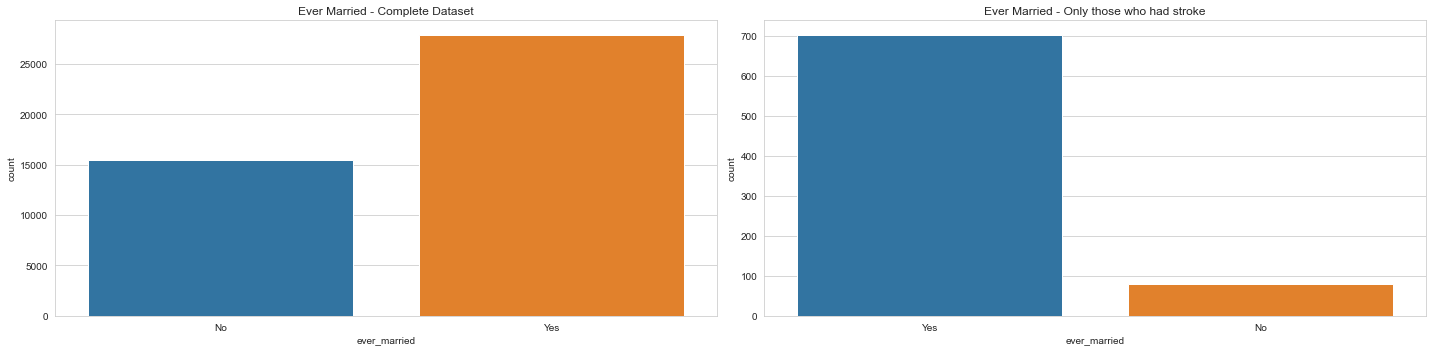

In [41]:
# Define a figure so that we can make two subplots, one for the complete dataset,
# and one for filtering the data to just those who had a stroke
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

sns.countplot(input_csv["ever_married"], ax=ax[0])
ax[0].set_title("Ever Married - Complete Dataset")

sns.countplot(input_csv[input_csv["stroke"] == 1]["ever_married"], ax=ax[1])
ax[1].set_title("Ever Married - Only those who had stroke")
plt.tight_layout()

plt.savefig("static/images/Ever Married Analysis.png",bbox_inches='tight')

## work_type

In [42]:
# Overview of work_type
# Get the exact number and percentage of people in the full dataset
s3 = input_csv.groupby("work_type").stroke.count()
s2 = input_csv["stroke"].count()
s4 = s3/s2*100

print(f"Total in full dataset: {s2}")
print(s3)
print()
print(f"Percentage in full dataset")
print(s4)

Total in full dataset: 43400
work_type
Govt_job          5440
Never_worked       177
Private          24834
Self-employed     6793
children          6156
Name: stroke, dtype: int64

Percentage in full dataset
work_type
Govt_job         12.534562
Never_worked      0.407834
Private          57.221198
Self-employed    15.652074
children         14.184332
Name: stroke, dtype: float64


In [43]:
# Get the exact number and percentage of people that had a stroke
s3 = input_csv.groupby("work_type").stroke.sum()
s2 = input_csv["stroke"].sum()
s4 = s3/s2*100

print(f"Total number of people with a stroke: {s2}")
print(s3)
print()
print(f"Percentage of people who had a stroke")
print(s4)

Total number of people with a stroke: 783
work_type
Govt_job          89
Never_worked       0
Private          441
Self-employed    251
children           2
Name: stroke, dtype: int64

Percentage of people who had a stroke
work_type
Govt_job         11.366539
Never_worked      0.000000
Private          56.321839
Self-employed    32.056194
children          0.255428
Name: stroke, dtype: float64


In [44]:
# In the cell above, we noticed that, despite making up as much as about 14.18% of the complete dataset,
# those whose work type is "children" make up only about 0.26% of those who had a stroke

# As "children" isn't very clear, we decide to check the max age for indiviudals with this work type

input_csv[input_csv["work_type"] == "children"]["age"].max()

16.0

We can observe from the cell above that the oldest person with work type "children" is 16 - a pretty low age. We therefore assume that a work type of "children" means this person is a child, and has no job.

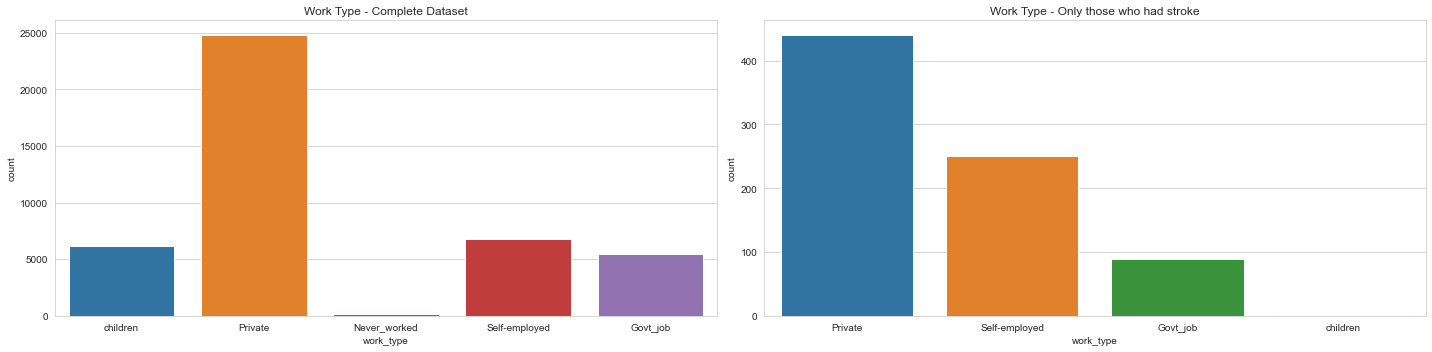

In [45]:
# Define a figure so that we can make two subplots, one for the complete dataset,
# and one for filtering the data to just those who had a stroke
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

sns.countplot(input_csv["work_type"], ax=ax[0])
ax[0].set_title("Work Type - Complete Dataset")

sns.countplot(input_csv[input_csv["stroke"] == 1]["work_type"], ax=ax[1])
ax[1].set_title("Work Type - Only those who had stroke")
plt.tight_layout()

plt.savefig("static/images/Work Type Analysis.png",bbox_inches='tight')

## Residence_type

In [46]:
# Overview of Residence_type
# Get the exact number and percentage of people in the full dataset
s3 = input_csv.groupby("Residence_type").stroke.count()
s2 = input_csv["stroke"].count()
s4 = s3/s2*100

print(f"Total in full dataset: {s2}")
print(s3)
print()
print(f"Percentage in full dataset")
print(s4)

Total in full dataset: 43400
Residence_type
Rural    21644
Urban    21756
Name: stroke, dtype: int64

Percentage in full dataset
Residence_type
Rural    49.870968
Urban    50.129032
Name: stroke, dtype: float64


In [47]:
# Get the exact number and percentage of people that had a stroke
s3 = input_csv.groupby("Residence_type").stroke.sum()
s2 = input_csv["stroke"].sum()
s4 = s3/s2*100

print(f"Total number of people with a stroke: {s2}")
print(s3)
print()
print(f"Percentage of people who had a stroke")
print(s4)

Total number of people with a stroke: 783
Residence_type
Rural    384
Urban    399
Name: stroke, dtype: int64

Percentage of people who had a stroke
Residence_type
Rural    49.042146
Urban    50.957854
Name: stroke, dtype: float64


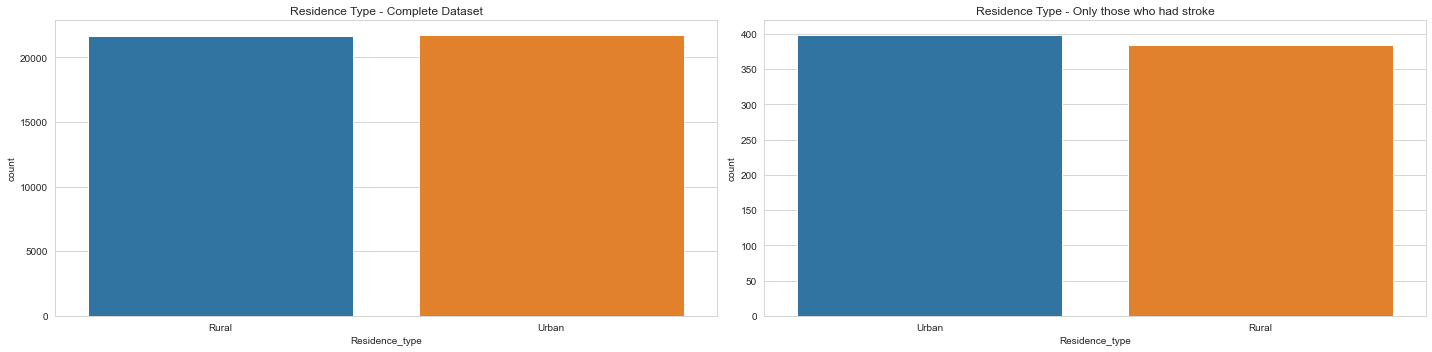

In [48]:
# Define a figure so that we can make two subplots, one for the complete dataset,
# and one for filtering the data to just those who had a stroke
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

sns.countplot(input_csv["Residence_type"], ax=ax[0])
ax[0].set_title("Residence Type - Complete Dataset")

sns.countplot(input_csv[input_csv["stroke"] == 1]["Residence_type"], ax=ax[1])
ax[1].set_title("Residence Type - Only those who had stroke")
plt.tight_layout()

plt.savefig("static/images/Residence Type Analysis.png",bbox_inches='tight')

## avg_glucose_level

In [49]:
# Overview of avg_glucose_level
input_csv["avg_glucose_level"].value_counts()

82.71     19
87.07     18
72.53     18
84.40     17
90.71     17
          ..
202.11     1
121.82     1
138.99     1
152.24     1
160.00     1
Name: avg_glucose_level, Length: 12543, dtype: int64

## Categorize avg_glucose_level

In [50]:
# Create the bins in which Data will be held
bins = [0, 139.99, 199.99, 300]

# Create the names for the five bins
group_labels = ["Normal", "Prediabetes", "T2 Diabetes"]

In [51]:
input_csv["glucose_group"] = pd.cut(input_csv["avg_glucose_level"], bins, labels=group_labels)
input_csv

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,glucose_group
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0,<20,Normal
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,55-59,Normal
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0,<20,Normal
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,70-74,Normal
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,<20,Prediabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,<20,Normal
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,55-59,T2 Diabetes
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,80-84,Normal
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,40-44,Normal


In [52]:
# Creating a group based off of the bins
glucose_group = input_csv.groupby("glucose_group")
glucose_group[["stroke", "hypertension", "heart_disease"]].sum()

,stroke,hypertension,heart_disease
glucose_group,,,
Normal,510,2761,1299
Prediabetes,105,516,289
T2 Diabetes,168,784,474


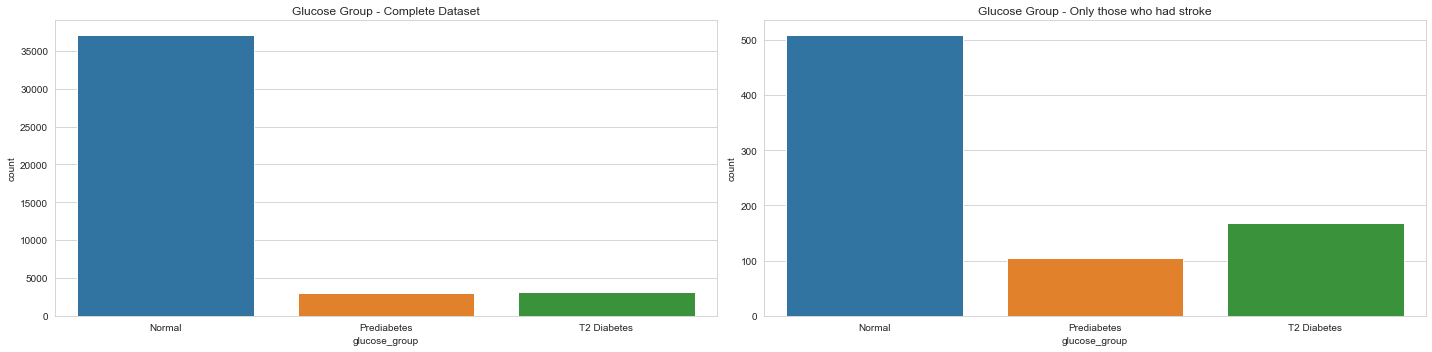

In [53]:
# Visualize how many people did and did not have a stroke
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

sns.countplot(input_csv["glucose_group"], ax=ax[0])
ax[0].set_title("Glucose Group - Complete Dataset")

sns.countplot(input_csv[input_csv["stroke"] == 1]["glucose_group"], ax=ax[1])
ax[1].set_title("Glucose Group - Only those who had stroke")
plt.tight_layout()

plt.savefig("static/images/Glucose Group Analysis.png",bbox_inches='tight')

## bmi

In [54]:
# Overview of bmi
input_csv["bmi"].value_counts()

27.7    271
27.6    267
26.8    266
26.1    265
27.1    260
       ... 
10.1      1
67.0      1
11.2      1
97.6      1
65.2      1
Name: bmi, Length: 555, dtype: int64

In [55]:
# How many unique values in bmi column
input_csv["bmi"].nunique()

555

In [56]:
# Null bmi
print(input_csv["bmi"].isnull().sum())

1462


In [57]:
# Null bmi with and without stroke
input_csv.loc[input_csv["bmi"].isna(), "stroke"].value_counts()

0    1322
1     140
Name: stroke, dtype: int64

In [58]:
# Analyze records with null bmi
rslt_df = input_csv.loc[input_csv["bmi"].isnull()]
rslt_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,glucose_group
81,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,60-64,T2 Diabetes
95,31091,Male,34.0,0,1,Yes,Private,Urban,106.23,NaN,formerly smoked,0,30-39,Normal
113,54312,Female,76.0,1,0,Yes,Self-employed,Urban,209.58,NaN,never smoked,0,75-79,T2 Diabetes
186,11999,Female,63.0,0,0,Yes,Govt_job,Rural,79.92,NaN,smokes,0,60-64,Normal
231,22470,Male,61.0,0,0,Yes,Govt_job,Urban,184.15,NaN,NaN,0,60-64,Prediabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43317,2558,Female,62.0,0,1,Yes,Govt_job,Urban,72.29,NaN,never smoked,0,60-64,Normal
43339,10463,Female,76.0,0,0,No,Private,Rural,100.55,NaN,never smoked,1,75-79,Normal
43351,7580,Female,58.0,1,0,Yes,Private,Urban,99.29,NaN,NaN,0,55-59,Normal
43371,18119,Female,78.0,0,0,Yes,Private,Urban,182.45,NaN,formerly smoked,0,75-79,Prediabetes


In [59]:
rslt_df2 = rslt_df.loc[input_csv["stroke"] == 1]
rslt_df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,glucose_group
81,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,60-64,T2 Diabetes
407,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,NaN,1,55-59,Normal
747,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,NaN,1,75-79,T2 Diabetes
1139,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,NaN,1,55-59,T2 Diabetes
1613,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,NaN,1,55-59,Prediabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42530,43103,Male,66.0,0,0,Yes,Self-employed,Urban,182.89,NaN,never smoked,1,65-69,Prediabetes
42839,47453,Female,67.0,1,0,Yes,Govt_job,Urban,234.43,NaN,never smoked,1,65-69,T2 Diabetes
43007,20773,Female,69.0,0,1,Yes,Self-employed,Rural,89.19,NaN,smokes,1,65-69,Normal
43100,58018,Male,67.0,0,0,Yes,Self-employed,Urban,136.79,NaN,smokes,1,65-69,Normal


In [60]:
rslt_df2.loc[rslt_df2["bmi"].isna(), "hypertension"].value_counts()

0    112
1     28
Name: hypertension, dtype: int64

In [61]:
rslt_df2.loc[rslt_df2["bmi"].isna(), "heart_disease"].value_counts()

0    107
1     33
Name: heart_disease, dtype: int64

In [62]:
rslt_df2.loc[rslt_df2["bmi"].isna(), "glucose_group"].value_counts()

Normal         89
T2 Diabetes    27
Prediabetes    24
Name: glucose_group, dtype: int64

In [63]:
# Calculate the mean and standard deviation BMI value
bmi_mean = input_csv["bmi"].mean()
bmi_standard_deviation = input_csv["bmi"].std()
print(f"BMI mean: {bmi_mean}\nBMI standard deviation: {bmi_standard_deviation}", "\n")

BMI mean: 28.605038390004296
BMI standard deviation: 7.770020497238738 



In [64]:
# Calculate what percent of the data is 1, 2, and 3 standard deviations from the mean
percent_of_data_1_standard_deviations_from_mean = round((len(input_csv[(input_csv["bmi"] > bmi_mean + bmi_standard_deviation)\
                                                     | (input_csv["bmi"] < bmi_mean - bmi_standard_deviation)]) / len(input_csv)) * 100, 2)

percent_of_data_2_standard_deviations_from_mean = round((len(input_csv[(input_csv["bmi"] > bmi_mean + (2 * bmi_standard_deviation))\
                                                     | (input_csv["bmi"] < bmi_mean - (2 * bmi_standard_deviation))]) / len(input_csv)) * 100, 2)

percent_of_data_3_standard_deviations_from_mean = round((len(input_csv[(input_csv["bmi"] > bmi_mean + (3 * bmi_standard_deviation))\
                                                     | (input_csv["bmi"] < bmi_mean - (3 * bmi_standard_deviation))]) / len(input_csv)) * 100, 2)

print(f"Percent of data 1 standard deviation from mean: {percent_of_data_1_standard_deviations_from_mean}")
print(f"Percent of data 2 standard deviations from mean: {percent_of_data_2_standard_deviations_from_mean}")
print(f"Percent of data 3 standard deviations from mean: {percent_of_data_3_standard_deviations_from_mean}")

Percent of data 1 standard deviation from mean: 28.36
Percent of data 2 standard deviations from mean: 3.8
Percent of data 3 standard deviations from mean: 0.95


In [65]:
# Smallest, largest, and average bmi of people who had a stroke
sm_bmi_stroke = input_csv.loc[input_csv.stroke==1, "bmi"].min()
lg_bmi_stroke = input_csv.loc[input_csv.stroke==1, "bmi"].max()
avg_agebmi_stroke = input_csv.loc[input_csv.stroke==1, "bmi"].mean()
print(f"Smallest bmi who had a stroke: {sm_bmi_stroke}")
print(f"Largest bmi who had a stroke: {lg_bmi_stroke}")
print(f"Average bmi of people who had a stroke: {avg_agebmi_stroke}")

Smallest bmi who had a stroke: 14.3
Largest bmi who had a stroke: 56.6
Average bmi of people who had a stroke: 29.868118195956455


In [66]:
bmi_stroke_df = pd.DataFrame(input_csv[(input_csv["stroke"] == 1)])
bmi_stroke_df.shape

(783, 14)

In [67]:
bmi_stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,glucose_group
63,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,65-69,T2 Diabetes
81,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,60-64,T2 Diabetes
141,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,80-84,Normal
257,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,45-49,Prediabetes
264,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,75-79,Prediabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43148,25110,Female,56.0,0,0,Yes,Private,Rural,83.27,32.9,smokes,1,55-59,Normal
43268,5392,Male,69.0,0,0,Yes,Self-employed,Rural,97.36,28.0,NaN,1,65-69,Normal
43304,35057,Female,80.0,0,0,Yes,Self-employed,Urban,75.91,26.7,never smoked,1,80-84,Normal
43318,64109,Male,62.0,1,1,Yes,Private,Rural,77.97,31.5,formerly smoked,1,60-64,Normal


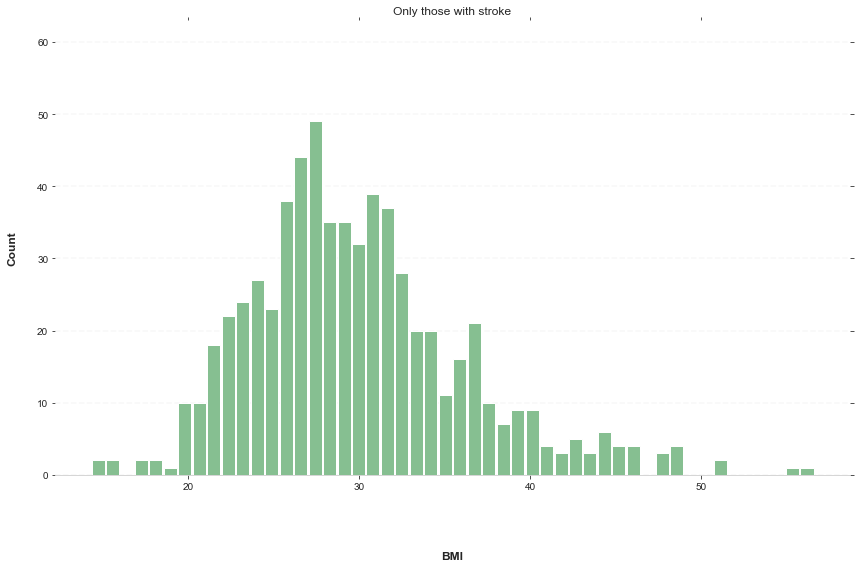

In [68]:
# Histogram of BMI

ax = bmi_stroke_df.hist(column='bmi', bins=50, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    x.set_title("Only those with stroke")

    # Set x-axis label
    x.set_xlabel("BMI", labelpad=60, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    
plt.tight_layout()

plt.savefig("static/images/BMI - Stroke Analysis.png",bbox_inches='tight')

In [69]:

bmi_stroke_df.to_csv("data/bmi_stroke_df.csv", index=False, header=True)

## Working with missing bmi data

### Options for dealing with missing bmi data:

1. Deleting Rows
1. Replacing With Mean/Median/Mode
1. Assigning An Unique Category
1. Predicting The Missing Values
1. Using Algorithms Which Support Missing Values

In [70]:
print(f"Mean bmi: {input_csv['bmi'].mean()}")
print(f"Median bmi: {input_csv['bmi'].median()}")
print(f"Mode bmi: {input_csv.mode()['bmi'][0]}")

Mean bmi: 28.605038390004296
Median bmi: 27.7
Mode bmi: 27.7


In [71]:
# Since the median bmi value is equal to the mode bmi value, fill NaN values with the median bmi
input_csv["bmi"].fillna(input_csv["bmi"].median(), inplace=True)

In [72]:
# Confirm no NaN values in the "bmi" column
input_csv.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
age_group                0
glucose_group            0
dtype: int64

## Categorize bmi

In [73]:
# Create the bins in which Data will be held
bins = [0, 18.5, 25, 30, 35, 40, 45, 50, 60, 100]

# Create the names for the five bins
group_labels = ["<18.5", "18.5-24.9", "25-29.9", "30-34.9", "35-39.9", "40-44.9", "45-49.9", "50-59.9", ">60"]

In [74]:
input_csv["bmi_range"] = pd.cut(input_csv["bmi"], bins, labels=group_labels)
input_csv

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,glucose_group,bmi_range
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0,<20,Normal,<18.5
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,55-59,Normal,35-39.9
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0,<20,Normal,<18.5
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,70-74,Normal,35-39.9
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,<20,Prediabetes,18.5-24.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,<20,Normal,18.5-24.9
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,55-59,T2 Diabetes,50-59.9
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,80-84,Normal,25-29.9
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,40-44,Normal,30-34.9


In [75]:
# Create the bins in which Data will be held
bins = [0, 18.5, 25, 30, 35, 40, 45, 50, 60, 100]

# Create the names for the bins
group_labels = ["Underweight", "Normal weight", "Overweight", "Obese Class I (Moderately obese)", "Obese Class II (Severely obese)", "Obese Class III (Very severely obese)", "Obese Class IV (Morbidly Obese)", "Obese Class V (Super Obese)", "Obese Class VI (Hyper Obese)"]

In [76]:
input_csv["bmi_group"] = pd.cut(input_csv["bmi"], bins, labels=group_labels)
input_csv

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,glucose_group,bmi_range,bmi_group
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0,<20,Normal,<18.5,Underweight
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,55-59,Normal,35-39.9,Obese Class II (Severely obese)
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0,<20,Normal,<18.5,Underweight
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,70-74,Normal,35-39.9,Obese Class II (Severely obese)
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,<20,Prediabetes,18.5-24.9,Normal weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,<20,Normal,18.5-24.9,Normal weight
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,55-59,T2 Diabetes,50-59.9,Obese Class V (Super Obese)
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,80-84,Normal,25-29.9,Overweight
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,40-44,Normal,30-34.9,Obese Class I (Moderately obese)


In [77]:
# Creating a group based off of the bins
bmi_group = input_csv.groupby("bmi_group")
bmi_group[["stroke", "hypertension", "heart_disease"]].sum()

,stroke,hypertension,heart_disease
bmi_group,,,
Underweight,8,20,13
Normal weight,128,436,304
Overweight,367,1488,865
Obese Class I (Moderately obese),164,998,485
Obese Class II (Severely obese),69,590,243
Obese Class III (Very severely obese),30,289,100
Obese Class IV (Morbidly Obese),13,131,28
Obese Class V (Super Obese),4,87,21
Obese Class VI (Hyper Obese),0,22,3


In [78]:
# Creating a group based off of the bins
bmi_group2 = input_csv.groupby("bmi_range")
bmi_group2[["stroke", "hypertension", "heart_disease"]].sum()

,stroke,hypertension,heart_disease
bmi_range,,,
<18.5,8,20,13
18.5-24.9,128,436,304
25-29.9,367,1488,865
30-34.9,164,998,485
35-39.9,69,590,243
40-44.9,30,289,100
45-49.9,13,131,28
50-59.9,4,87,21
>60,0,22,3


In [79]:
# Creating a group based off of the bins
bmi_group2 = input_csv.groupby("bmi_group")
bmi_group2["age"].mean()

bmi_group
Underweight                              10.114237
Normal weight                            34.853233
Overweight                               48.371495
Obese Class I (Moderately obese)         49.837412
Obese Class II (Severely obese)          48.718568
Obese Class III (Very severely obese)    47.951928
Obese Class IV (Morbidly Obese)          46.794381
Obese Class V (Super Obese)              45.100616
Obese Class VI (Hyper Obese)             44.179775
Name: age, dtype: float64

In [80]:
# Creating a group based off of the bins
bmi_group2 = input_csv.groupby("bmi_group")
bmi_group2["id"].count()

bmi_group
Underweight                               3290
Normal weight                            11157
Overweight                               13171
Obese Class I (Moderately obese)          8285
Obese Class II (Severely obese)           4245
Obese Class III (Very severely obese)     1893
Obese Class IV (Morbidly Obese)            783
Obese Class V (Super Obese)                487
Obese Class VI (Hyper Obese)                89
Name: id, dtype: int64

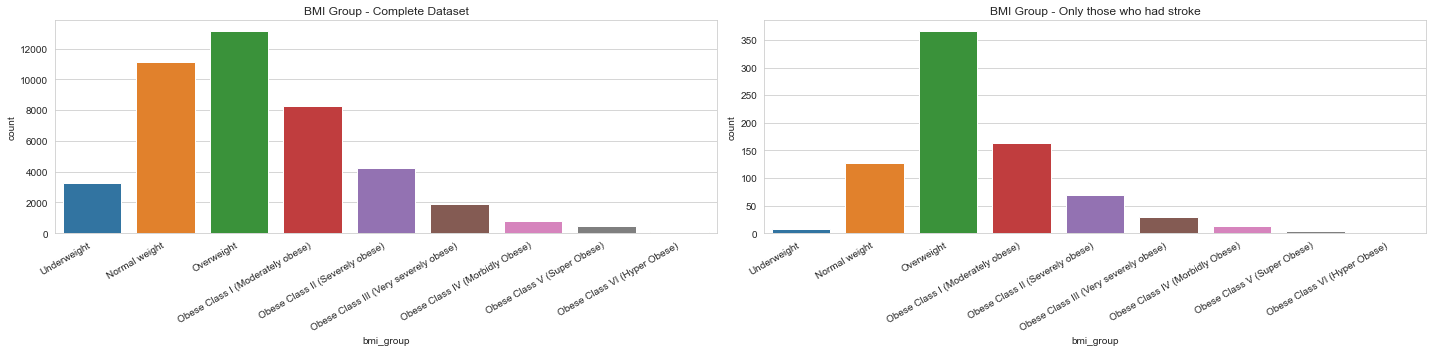

In [81]:
# Visualize how many people did and did not have a stroke
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

sns.countplot(input_csv["bmi_group"], ax=ax[0])
ax[0].set_title("BMI Group - Complete Dataset")

sns.countplot(input_csv[input_csv["stroke"] == 1]["bmi_group"], ax=ax[1])
ax[1].set_title("BMI Group - Only those who had stroke")

plt.setp(ax[0].get_xticklabels() + ax[1].get_xticklabels(), rotation=30, ha='right')

plt.tight_layout()

plt.savefig("static/images/BMI Group Analysis.png",bbox_inches='tight')

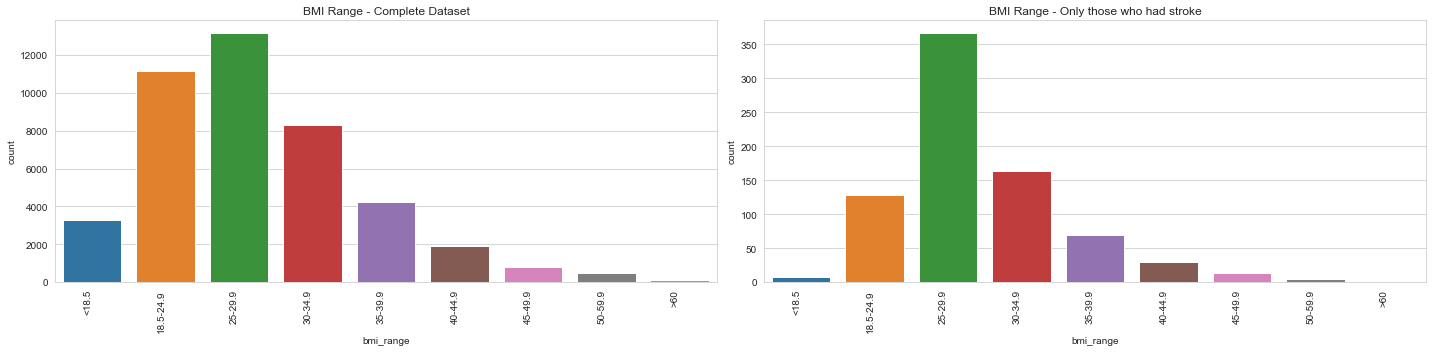

In [82]:
# Visualize how many people did and did not have a stroke
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

sns.countplot(input_csv["bmi_range"], ax=ax[0])
ax[0].set_title("BMI Range - Complete Dataset")

sns.countplot(input_csv[input_csv["stroke"] == 1]["bmi_range"], ax=ax[1])
ax[1].set_title("BMI Range - Only those who had stroke")

plt.setp(ax[0].get_xticklabels() + ax[1].get_xticklabels(), rotation=90, ha='right')

plt.tight_layout()

plt.savefig("static/images/BMI Range Analysis.png",bbox_inches='tight')

## smoking_status

In [83]:
# Overview of smoking_status
input_csv["smoking_status"].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [84]:
# Get the exact number of people in each smoking group that had a stroke
print(input_csv[input_csv["stroke"] == 1]["smoking_status"].value_counts())

never smoked       284
formerly smoked    221
smokes             133
Name: smoking_status, dtype: int64


In [85]:
# Null smoking_status

print(input_csv["smoking_status"].isnull().sum())

13292


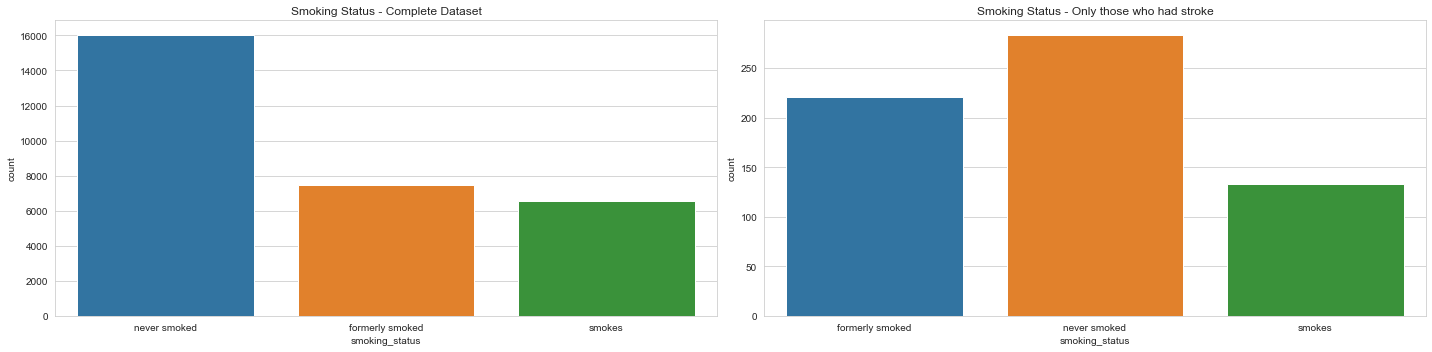

In [86]:
# Visualize how many people did and did not have a stroke
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

sns.countplot(input_csv["smoking_status"], ax=ax[0])
ax[0].set_title("Smoking Status - Complete Dataset")

sns.countplot(input_csv[input_csv["stroke"] == 1]["smoking_status"], ax=ax[1])
ax[1].set_title("Smoking Status - Only those who had stroke")

plt.tight_layout()

plt.savefig("static/images/Smoking Status Analysis.png",bbox_inches='tight')

## Missing smoking_status data

### Choosing the right Encoding method - Label vs OneHot Encoder
We will not fill in these NaNs and use use OneHot Encoder once we get to the Machine Learning notebook

In [87]:
# Get the exact number of people in each group of the entire dataset
print(input_csv["smoking_status"].value_counts(), "\n")

# Get the exact number of people in each group,
# after filtering to just those who had a stroke
print(input_csv[input_csv["stroke"] == 1]["smoking_status"].value_counts())

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64 

never smoked       284
formerly smoked    221
smokes             133
Name: smoking_status, dtype: int64


In [88]:
# Replacing missing data with unknown
input_csv["smoking_status"] = input_csv["smoking_status"].fillna("unknown")
input_csv

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,glucose_group,bmi_range,bmi_group
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,unknown,0,<20,Normal,<18.5,Underweight
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,55-59,Normal,35-39.9,Obese Class II (Severely obese)
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,unknown,0,<20,Normal,<18.5,Underweight
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,70-74,Normal,35-39.9,Obese Class II (Severely obese)
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,unknown,0,<20,Prediabetes,18.5-24.9,Normal weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,<20,Normal,18.5-24.9,Normal weight
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,55-59,T2 Diabetes,50-59.9,Obese Class V (Super Obese)
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,80-84,Normal,25-29.9,Overweight
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,40-44,Normal,30-34.9,Obese Class I (Moderately obese)


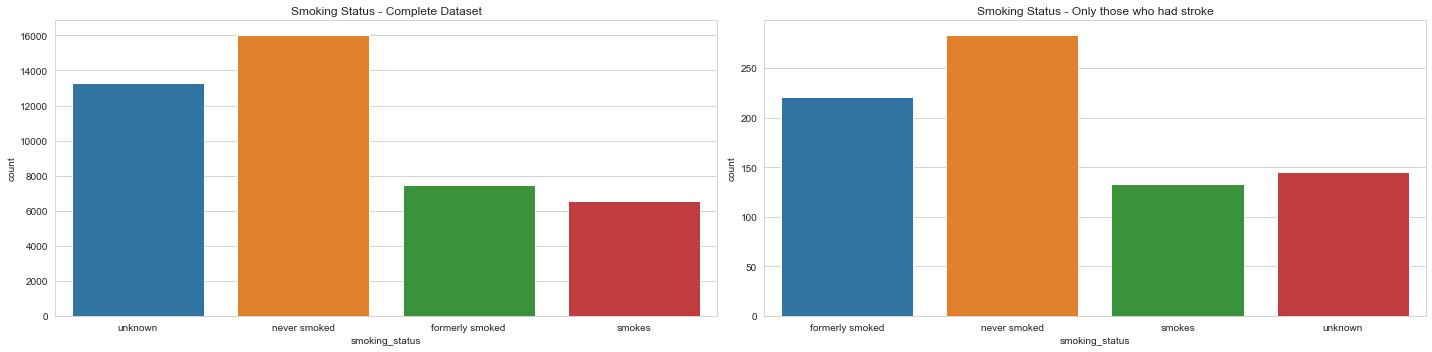

In [89]:
# Visualize how many people did and did not have a stroke
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

sns.countplot(input_csv["smoking_status"], ax=ax[0])
ax[0].set_title("Smoking Status - Complete Dataset")

sns.countplot(input_csv[input_csv["stroke"] == 1]["smoking_status"], ax=ax[1])
ax[1].set_title("Smoking Status - Only those who had stroke")

plt.tight_layout()

plt.savefig("static/images/Smoking Status Analysis.png",bbox_inches='tight')

## stroke

In [90]:
# Overview of stroke
input_csv["stroke"].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [91]:
input_csv

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,glucose_group,bmi_range,bmi_group
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,unknown,0,<20,Normal,<18.5,Underweight
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,55-59,Normal,35-39.9,Obese Class II (Severely obese)
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,unknown,0,<20,Normal,<18.5,Underweight
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,70-74,Normal,35-39.9,Obese Class II (Severely obese)
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,unknown,0,<20,Prediabetes,18.5-24.9,Normal weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,<20,Normal,18.5-24.9,Normal weight
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,55-59,T2 Diabetes,50-59.9,Obese Class V (Super Obese)
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,80-84,Normal,25-29.9,Overweight
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,40-44,Normal,30-34.9,Obese Class I (Moderately obese)


## Model Building

### Feature selection

From our analysis, we determine that our features should be:

#### Categorical:
1. gender
2. hypertension
3. heart_disease
4. ever_married
5. work_type
6. residence_type
7. smoking status

#### Numerical:
1. age
2. average glucose level
3. bmi

### Replace string data with numeric

In [92]:
stroke_df = input_csv.copy(deep=True)

In [93]:
Gender = {"Other":2,"Male":1, "Female":0}
Married = {"Yes":1, "No":0}
Work_Type = {"Private":0, "Self-employed":1, "children":2, "Govt_job":3,"Never_worked":4}
Residence = {"Urban":0, "Rural":1}
Smoking = {"never smoked":0, "formerly smoked":1, "smokes":2, "unknown":3}
# BMI = {"Normal weight":0, "unknown":1, "Underweight":2, "Overweight":3, "Obese Class I (Moderately obese)":4,
#      "Obese Class II (Severely obese)":5, "Obese Class III (Very severely obese)":6, "Obese Class IV (Morbidly Obese)":7,
#      "Obese Class V (Super Obese)":8, "Obese Class VI (Hyper Obese)":9}
# Glucose = {"Normal":0, "Prediabetes":1, "T2 Diabetes":2}

In [94]:
stroke_df = stroke_df.replace({"gender":Gender, 
                                  "ever_married":Married, 
                                  "work_type":Work_Type,
                                  "smoking_status":Smoking,
                                  "Residence_type":Residence})

In [95]:
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,glucose_group,bmi_range,bmi_group
0,30669,1,3.0,0,0,0,2,1,95.12,18.0,3,0,<20,Normal,<18.5,Underweight
1,30468,1,58.0,1,0,1,0,0,87.96,39.2,0,0,55-59,Normal,35-39.9,Obese Class II (Severely obese)
2,16523,0,8.0,0,0,0,0,0,110.89,17.6,3,0,<20,Normal,<18.5,Underweight
3,56543,0,70.0,0,0,1,0,1,69.04,35.9,1,0,70-74,Normal,35-39.9,Obese Class II (Severely obese)
4,46136,1,14.0,0,0,0,4,1,161.28,19.1,3,0,<20,Prediabetes,18.5-24.9,Normal weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,0,10.0,0,0,0,2,0,58.64,20.4,0,0,<20,Normal,18.5-24.9,Normal weight
43396,5450,0,56.0,0,0,1,3,0,213.61,55.4,1,0,55-59,T2 Diabetes,50-59.9,Obese Class V (Super Obese)
43397,28375,0,82.0,1,0,1,0,0,91.94,28.9,1,0,80-84,Normal,25-29.9,Overweight
43398,27973,1,40.0,0,0,1,0,0,99.16,33.2,0,0,40-44,Normal,30-34.9,Obese Class I (Moderately obese)


In [96]:
# We don't want to work with unique identifiers so we will drop the id column

stroke_clean = stroke_df.drop(["id"], axis=1)
stroke_clean.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,glucose_group,bmi_range,bmi_group
0,1,3.0,0,0,0,2,1,95.12,18.0,3,0,<20,Normal,<18.5,Underweight
1,1,58.0,1,0,1,0,0,87.96,39.2,0,0,55-59,Normal,35-39.9,Obese Class II (Severely obese)
2,0,8.0,0,0,0,0,0,110.89,17.6,3,0,<20,Normal,<18.5,Underweight
3,0,70.0,0,0,1,0,1,69.04,35.9,1,0,70-74,Normal,35-39.9,Obese Class II (Severely obese)
4,1,14.0,0,0,0,4,1,161.28,19.1,3,0,<20,Prediabetes,18.5-24.9,Normal weight


In [97]:
# Make new dataframe only including relevant features
stroke_data = pd.DataFrame()

# Add categorical and numerical features to dataframe
# stroke_data["id"] = stroke_clean["id"]
stroke_data["gender"] = stroke_clean["gender"]
stroke_data["age"] = stroke_clean["age"]
stroke_data["hypertension"] = stroke_clean["hypertension"]
stroke_data["heart_disease"] = stroke_clean["heart_disease"]
stroke_data["ever_married"] = stroke_clean["ever_married"]
stroke_data["work_type"] = stroke_clean["work_type"]
stroke_data["Residence_type"] = stroke_clean["Residence_type"]
stroke_data["avg_glucose_level"] = stroke_clean["avg_glucose_level"]
stroke_data["bmi"] = stroke_clean["bmi"]
stroke_data["smoking_status"] = stroke_clean["smoking_status"]

# Add label to dataframe
stroke_data["stroke"] = stroke_clean["stroke"]

# Preview our new dataframe
stroke_data


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0,0,0,2,1,95.12,18.0,3,0
1,1,58.0,1,0,1,0,0,87.96,39.2,0,0
2,0,8.0,0,0,0,0,0,110.89,17.6,3,0
3,0,70.0,0,0,1,0,1,69.04,35.9,1,0
4,1,14.0,0,0,0,4,1,161.28,19.1,3,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,0,10.0,0,0,0,2,0,58.64,20.4,0,0
43396,0,56.0,0,0,1,3,0,213.61,55.4,1,0
43397,0,82.0,1,0,1,0,0,91.94,28.9,1,0
43398,1,40.0,0,0,1,0,0,99.16,33.2,0,0


In [98]:
# Our initial analysis is complete and we'll export this dataframe as a csv file, and perform the 
# Machine Learning in a new notebook.
import os

# Export final DataFrame as csv
stroke_data.to_csv("data/stroke_ML_dataset.csv", index=False, header=True)

#### List of input values in order (with codification) for Machine Learning

 - Gender (Female=0,Male=1,Other=2)
 - Age (actual value)
 - Hypertension (No=0,Yes=1)
 - Heart Diserase (No=0,Yes=1)
 - Married (No=0,Yes=1)
 - Work Type (Private=0,Self-employed=1,children=2,Govt_job=3,Never_worked=4")
 - Residence Type (Urban=0,Rural=1)
 - Average Blood Glucose Level (actual value)
 - BMI (actual value)
 - Smoking (never smoked=0,formerly smoked=1,smokes=2,unkown=3)